<a href="https://colab.research.google.com/github/himansu9805/machine_learning/blob/main/linear_regression_in_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing linear regression in one variable using gradient descent algorithm



### Importing required packages and dataset





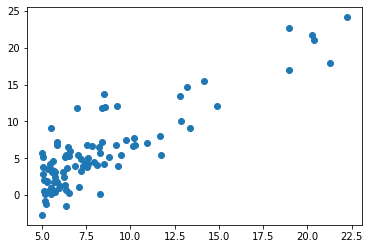

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Machine Learning/ex1data1.txt')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

### Defining the linear regression class and required functions using gradient descent algorithm

In [2]:
class LinearRegressionGD:
  def __init__(self):
    self.m = 0
    self.c = 0
  
  def fit(self, X, Y, learning_rate, epochs):
    m = 0
    c = 0
    n = float(len(X))

    for i in range(epochs):
      Y_pred = m*X + c
      D_m = (1/n) * sum((Y_pred - Y) * X)
      D_c = (1/n) * sum(Y_pred - Y)
      m = m - learning_rate*D_m
      c = c - learning_rate*D_c

    self.m = m
    self.c = c


  def predict(self, X):
    return self.m*X + self.c

### Fitting data with the aboved defined function

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

lrgd = LinearRegressionGD()
lrgd.fit(X_train, Y_train, learning_rate=0.001, epochs=10000)

### Predicting values

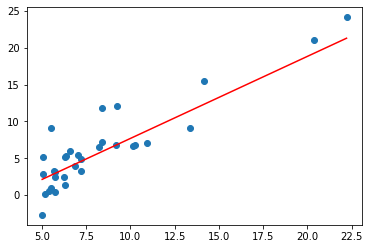

In [4]:
Y_pred = lrgd.predict(X_test)

plt.scatter(X_test, Y_test) 
plt.plot([min(X_test), max(X_test)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

### Calculating the accuracy

In [5]:
def my_r2_score(Y, Y_pred):
  n = len(Y)
  sst = 0
  ssr = 0
  Y_mean = np.asarray(Y).mean()
  for i in range(n):
    ssr += (Y.iloc[i] - Y_pred.iloc[i]) ** 2
    sst += (Y.iloc[i] - Y_mean) ** 2
  r2 = 1 - (ssr/sst)
  print(r2)

In [7]:
my_r2_score(Y_test, Y_pred)

0.7950850545131738
